<a href="https://colab.research.google.com/github/somyaup/PIB-using-PINN/blob/main/Copy_of_PhysicsSOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
import myOptimizers as optims
#import torch.optim as optims
import importlib
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Functions**
##iћ d/dt |**Ψ**(x,t)⟩=**H** |**Ψ**(x,t)⟩

Particle in a box of length L from x=0 to x=L

##wavefuction :wf=Ψ
##differential equation =(iћ d/dt -E - 1/2 m ω^2 x^2) |**Ψ**(x,t)⟩



# New section

In [ ]:
def init_weights(scale, network_size, rs = npr.RandomState(42)):
  return [(rs.randn(inSize, outSize) * scale,
          rs.rand(outSize) * scale)
          for inSize, outSize in zip(network_size[:-1], network_size[1:])]

Model Definition

In [ ]:
 def activation(x):
  return (2 / (1.0 + np.exp(-2*x))) - 1

def psi(nnparams, input):
  initInput = input
  xtilda = (initInput - x0)/(x1 - x0)
 
  for w,b in nnparams:
    output = np.dot(input, w) + b
    input = activation(output)
  
  #return (1-xtilda)*psi0 + xtilda*psi1 + (1-np.exp(xtilda * (1-xtilda)))*output
  return output

dpsi = elementwise_grad(psi, 1)
ddpsi = elementwise_grad(dpsi, 1)

In [ ]:
# def objective(params, step):
#   pcrc1 = 10
#   nnparams = params["nn"]
#   E = params["E"]
  
#   wf = psi(nnparams, x)
#   diffeq =  ddpsi(nnparams, x)+ np.multiply(E*np.ones(x.shape)-x**2, wf)
#   y2 = wf**2 #probability fn
#   prob = np.sum((y2[1:] + y2[0:-1]) / 2 * (x[1:] - x[0:-1]))

#   mean = np.mean(diffeq**2)
#   #loss = mean + (1-prob)**2 + (pcrc1/prob + pcrc1*prob) + 15*(psi0 - wf[0])**2 + 15*(psi1 - wf[-1])**2
#   loss= mean + (1-prob)**2 + (pcrc1/prob + pcrc1*prob)
#   if(step%100==0):
#     print ("Iteration " + str(step) + "\ndiffeq = " + str(mean) + "\nprob = " + str(prob))
#     #print ("loss = " + str(loss) + "\nE = " + str(params['E']))
#     print ("loss = " + str(loss))
#     print ("--------------------------------------------------------------")
#     return loss

def objective(params, step):
  pcrc1 = 15
  nnparams = params["nn"]
  #E = params["E"]

  wf = psi(nnparams, x)
  diffeq = -0.5 * ddpsi(nnparams, x) - np.multiply(30*np.ones(x.shape) - x**2, wf) 
  y2 = wf**2 #probability fn
  prob = np.sum((y2[1:] + y2[0:-1]) / 2 * (x[1:] - x[0:-1]))

  mean = np.mean(diffeq**2)
  loss = mean + (1-prob)**2 + (pcrc1/prob + pcrc1*prob) #+ 15*(psi0 - wf[0])**2 + 15*(psi1 - wf[-1])**2

  if(step%100==0):
    print ("Iteration " + str(step) + "\ndiffeq = " + str(mean) + "\nprob = " + str(prob))
    print ("loss = " + str(loss))# + "\nE = " + str(params['E']))
    print ("--------------------------------------------------------------")

  return loss


**Intializations**

In [ ]:
psi0 = 0 # Boundry condition
psi1 = 0 # Boundry condition
l = 2 # Length of 1D box
n = 9# Energy level to be found
scale = 2 # For initialization
divs = 600 # Divisions of x scale
x0 = -scale
x1 = scale

In [ ]:
#Defining the network
nn_params = init_weights(scale/(x1-x0), network_size = [1,32,32,1])

#Initializing a random Eighen Function

Einit = 30.0
# params = {"nn" : nn_params, "E": Einit}
params = {"nn" : nn_params}
#input space
x = np.linspace(x0, x1, divs)[:, None]
V = np.zeros(x.shape)

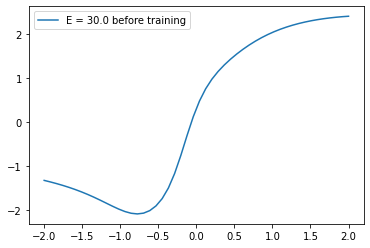

In [ ]:
# print(V.shape, x.shape)
# xs=x**2
# print(xs.shape)
# print (nn_params)
import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = psi(params['nn'], x)

plt.plot(x, y, label='E = '+str(Einit)+' before training')  # Plotting the NN output
#plt.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'r--', label='analytical')  # Plotting the actual wavefuncion
plt.legend()

Running Model

In [ ]:
optims = importlib.reload(optims)

params = optims.adam (grad(objective), params, step_size=0.001, num_iters=100000)
#params = optims.sgd(grad(objective), params)
''' {'params': model.base.parameters()},
                {'params': model.classifier.parameters(), 'lr': 1e-3}
            ], lr=1e-2, momentum=0.9)'''

Iteration 0
diffeq = Autograd ArrayBox with value 3656.533830010241
prob = Autograd ArrayBox with value 17.654333892000466
loss = Autograd ArrayBox with value 4199.565325505087
--------------------------------------------------------------
Iteration 100
diffeq = Autograd ArrayBox with value 46.01870007910274
prob = Autograd ArrayBox with value 0.2789270951341098
loss = Autograd ArrayBox with value 104.50004597694729
--------------------------------------------------------------
Iteration 200
diffeq = Autograd ArrayBox with value 45.36617314412687
prob = Autograd ArrayBox with value 0.28522261477070104
loss = Autograd ArrayBox with value 102.74591934924769
--------------------------------------------------------------
Iteration 300
diffeq = Autograd ArrayBox with value 45.10830983831037
prob = Autograd ArrayBox with value 0.2904598418058339
loss = Autograd ArrayBox with value 101.6109055088378
--------------------------------------------------------------
Iteration 400
diffeq = Autograd

KeyboardInterrupt: ignored

Results For 1D Box with V=0

# Results for V=0 for bounded box

n =  9 
l =  2 
E =  -0.537431002535084
(50, 1)


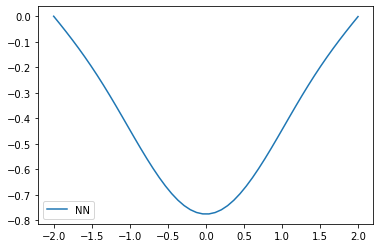

In [ ]:
#eint=0
# Without prob reg
import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = psi(params['nn'], x)
print("n = ", n, "\nl = ", l ,"\nE = ", params['E'])
plt.plot(x, y, label='NN')  # Plotting the NN output
#plt.plot(x, np.sqrt(2/l) * np.sin(##6*np.pi/2 * (x-x0)/l), 'r--', label='analytical')  # Plotting the actual wavefuncion
plt.legend()
print(x.shape)

n =  9 
l =  2 
E =  50.472087619608665


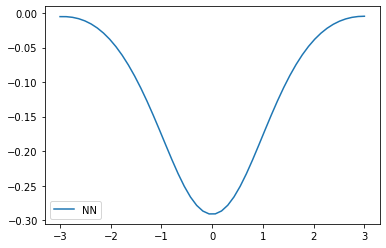

In [ ]:

# Einit=80
import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = psi(params['nn'], x)
print("n = ", n, "\nl = ", l ,"\nE = ", params['E'])
plt.plot(x, y, label='NN')  # Plotting the NN output
#.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'r--', label='analytical')  # Plotting the actual wavefuncion
plt.legend()

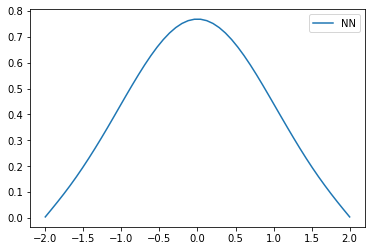

In [ ]:
#Eint=85
well=4
import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = -psi(params['nn'], x)
#print("n = ", n, "\nl = ", l ,"\nE = ", En1l1)
plt.plot(x, y, label='NN')  # Plotting the NN output
#plt.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'r--', label='analytical')  # Plotting the actual wavefuncion
plt.legend()

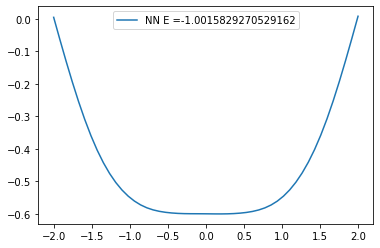

In [ ]:
#n = 1 l = 1 Einit = 0 omega=E
# With prob reg
import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = -psi(params['nn'], x)
#print("n = ", n, "\nl = ", l ,"\nE = ", str(params['E']))
plt.plot(x, y, label='NN '+'E ='+str(params['E']))  # Plotting the NN output
#plt.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'r--', label='analytical')  # Plotting the actual wavefuncion
plt.legend()

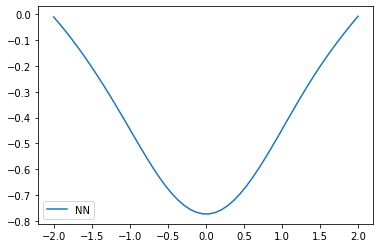

In [ ]:
#n = 1 l = 1
#w=2 E=1
import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = -psi(params['nn'], x)

plt.plot(x, y, label='NN')  # Plotting the NN output
#plt.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'r--', label='analytical')  # Plotting the actual wavefuncion
plt.legend()


n =  9 
l =  2 
E =  -2.0


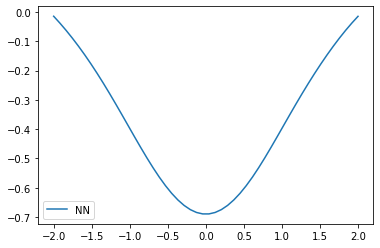

In [ ]:
#E = 4.5 w=1
#With prob reg
import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = -psi(params['nn'], x)
print("n = ", n, "\nl = ", l ,"\nE = ", str(params['E']))
plt.plot(x, y, label='NN')  # Plotting the NN output
#plt.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'r--', label='analytical')  # Plotting the actual wavefuncion
plt.legend()

n =  9 
l =  2 
E =  -2.0


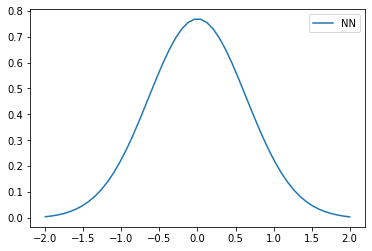

In [ ]:
#E = 6 w=3
#With prob reg
import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = -psi(params['nn'], x)
print("n = ", n, "\nl = ", l ,"\nE = ", str(params['E']))
plt.plot(x, y, label='NN')  # Plotting the NN output
#plt.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'r--', label='analytical')  # Plotting the actual wavefuncion
plt.legend()

n =  9 
l =  2 
E =  -2.0


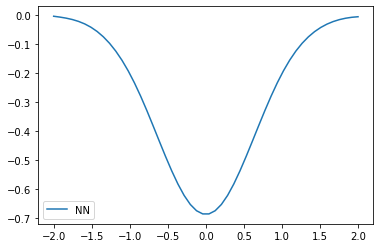

In [ ]:
#E = 9 w=1
#With prob reg
import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = -psi(params['nn'], x)
print("n = ", n, "\nl = ", l ,"\nE = ", str(params['E']))
plt.plot(x, y, label='NN')  # Plotting the NN output
#plt.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'r--', label='analytical')  # Plotting the actual wavefuncion
plt.legend()

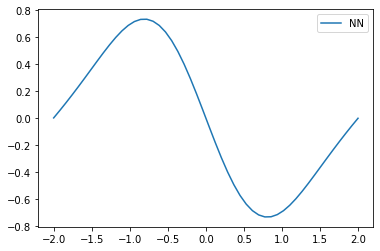

In [ ]:
#E = 4.5 w=1
#With prob reg
import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = -psi(params['nn'], x)
plt.plot(x, y, label='NN')  # Plotting the NN output
#plt.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'r--', label='analytical')  # Plotting the actual wavefuncion
plt.legend()

# Bounded Box with Potential Functions

Case 1 - Potential Step

In [ ]:
V[149:] = 150
#print(np.multiply(V, 2*np.ones(x.shape)))

n =  5 
l =  2 
E =  28.438288711738537


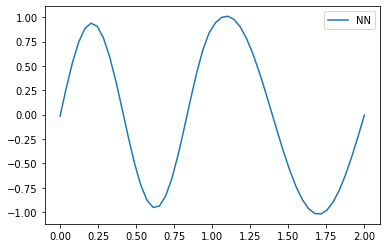

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = psi(params['nn'], x)
print("n = ", n, "\nl = ", l ,"\nE = ", params['E'])
plt.plot(x, y, label='NN')  # Plotting the NN output
#plt.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'r--', label='analytical')  # Plotting the actual wavefuncion
plt.legend()

Case 2 - Potential Well

In [ ]:
V[100:200]

Case 3 - Linear Potential

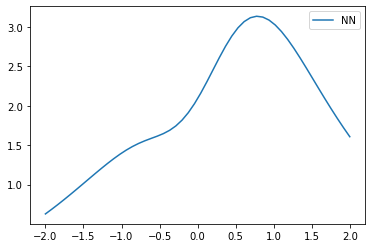

In [ ]:
#E = 4.5 w=1
#With prob reg
import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = -psi(params['nn'], x)
plt.plot(x, y, label='NN')  # Plotting the NN output
#plt.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'r--', label='analytical')  # Plotting the actual wavefuncion
plt.legend()